In [374]:
import h5py
import numpy as np
import seaborn as sns
import sklearn.preprocessing
import matplotlib.pyplot as plt

# %hist -o -g -f ipython_history.md

In [14]:
def get_matlab_data(file_path, is_label: bool):
    """reading a .mat file to extract the images or the labels"""

    with h5py.File(file_path, 'r') as f:
        
        print(f"Started reading {file_path} . . . ")
    
        data_keys =  list(f.keys())[1]
        refs = f[data_keys][0][:] # get object references
        num_of_examples = len(refs)
    
        if is_label: # Check if the this is a labels file
            labels_data =  np.array(
                [''.join(map(chr, np.squeeze(f[refs[i]]))) for i in range(num_of_examples)]
                )
            print(f"Completed reading {file_path} labels file")   
            return labels_data  
        else: # If not labels file
            examples_data =  np.array(
                [np.transpose(np.array(f[refs[i]])) for i in range(num_of_examples)]
                )
            print(f"Completed reading {file_path} examples file")   
            return examples_data


In [15]:
# Extracting examples from the .mat files

train_data = get_matlab_data('Data/train_data.mat', is_label=False)
validation_data = get_matlab_data('Data/val_data.mat', is_label=False)
test_data = get_matlab_data('Data/test_data.mat', is_label=False)

Started reading Data/train_data.mat . . . 
Completed reading Data/train_data.mat examples file
Started reading Data/val_data.mat . . . 
Completed reading Data/val_data.mat examples file
Started reading Data/test_data.mat . . . 
Completed reading Data/test_data.mat examples file


In [4]:
print(f"The training data has a shape of {train_data.shape}")
print(f"The validation data has a shape of {validation_data.shape}")
print(f"The test data has a shape of {test_data.shape}")

The training data has a shape of (29894, 128, 128)
The validation data has a shape of (3733, 128, 128)
The test data has a shape of (3733, 128, 128)


In [5]:
# Extracting label data from the .mat files
train_label = get_matlab_data('Data/train_labels.mat', is_label=True)
validation_label = get_matlab_data('Data/val_labels.mat', is_label=True)
test_label = get_matlab_data('Data/test_labels.mat', is_label=True)

Started reading Data/train_labels.mat . . . 
Completed reading Data/train_labels.mat
Started reading Data/val_labels.mat . . . 
Completed reading Data/val_labels.mat
Started reading Data/test_labels.mat . . . 
Completed reading Data/test_labels.mat


In [6]:
def minmaxscaler(data, global_min, global_max):
    """Normlising examples between 0-1 using the global minimum and maximum"""    
    return (data - global_min)/(global_max - global_min)

In [7]:
# Normalising the data 0 -> 1

global_min = np.amin(np.concatenate((train_data, test_data, validation_data)))
global_max = np.amax(np.concatenate((train_data, test_data, validation_data)))

train_data_scaled = minmaxscaler(train_data, global_min, global_max)
test_data_scaled = minmaxscaler(test_data, global_min, global_max)
validation_data_scaled = minmaxscaler(validation_data, global_min, global_max)

C:\Users\nyasha\anaconda3\envs\masters\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

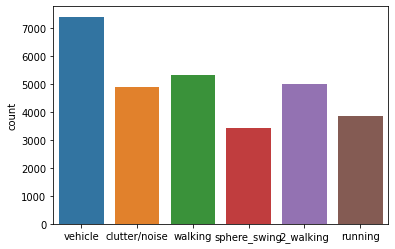

In [8]:
# Creating a count plot
sns.countplot(train_label)

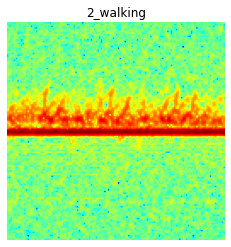

In [380]:
def plot_random_spectrogram():
    """Plots a random image from the training data"""
    image_num = np.random.randint(len(train_data))
    random_image = train_data[image_num]
    plt.imshow(random_image, cmap='jet')
    plt.title(f'{train_label[image_num]}')
    plt.axis('off')
    plt.show()

plot_random_spectrogram()


In [386]:
walking_data = train_data_scaled[np.where(train_label == 'walking')].flatten()
vehicle_data = train_data_scaled[np.where(train_label == 'vehicle')].flatten()
clutter_data = train_data_scaled[np.where(train_label == 'clutter/noise')].flatten()
sphere_swing_data = train_data_scaled[np.where(train_label == 'sphere_swing')].flatten()
walking_2_data = train_data_scaled[np.where(train_label == '2_walking')].flatten()
running_data = train_data_scaled[np.where(train_label == 'running')].flatten()

In [381]:
clutter_data = train_data_scaled[np.where(train_label == 'clutter/noise')]
avg_clutter_image = sum(clutter_data)/len(clutter_data)

vehicle_data = train_data_scaled[np.where(train_label == 'vehicle')]
avg_vehicle_image = sum(vehicle_data)/len(vehicle_data)

walking_data = train_data_scaled[np.where(train_label == 'walking')]
avg_walking_image = sum(walking_data)/len(walking_data)

sphere_swing_data = train_data_scaled[np.where(train_label == 'sphere_swing')]
avg_sphere_swing_image = sum(sphere_swing_data)/len(sphere_swing_data)

running_data = train_data_scaled[np.where(train_label == 'running')]
avg_running_image = sum(running_data)/len(running_data)

walking_2_data = train_data_scaled[np.where(train_label == '2_walking')]
avg_walking_2_image = sum(walking_2_data)/len(walking_2_data)


In [275]:
avg_clutter_image.shape

(128, 128)

Figure(1600x800)


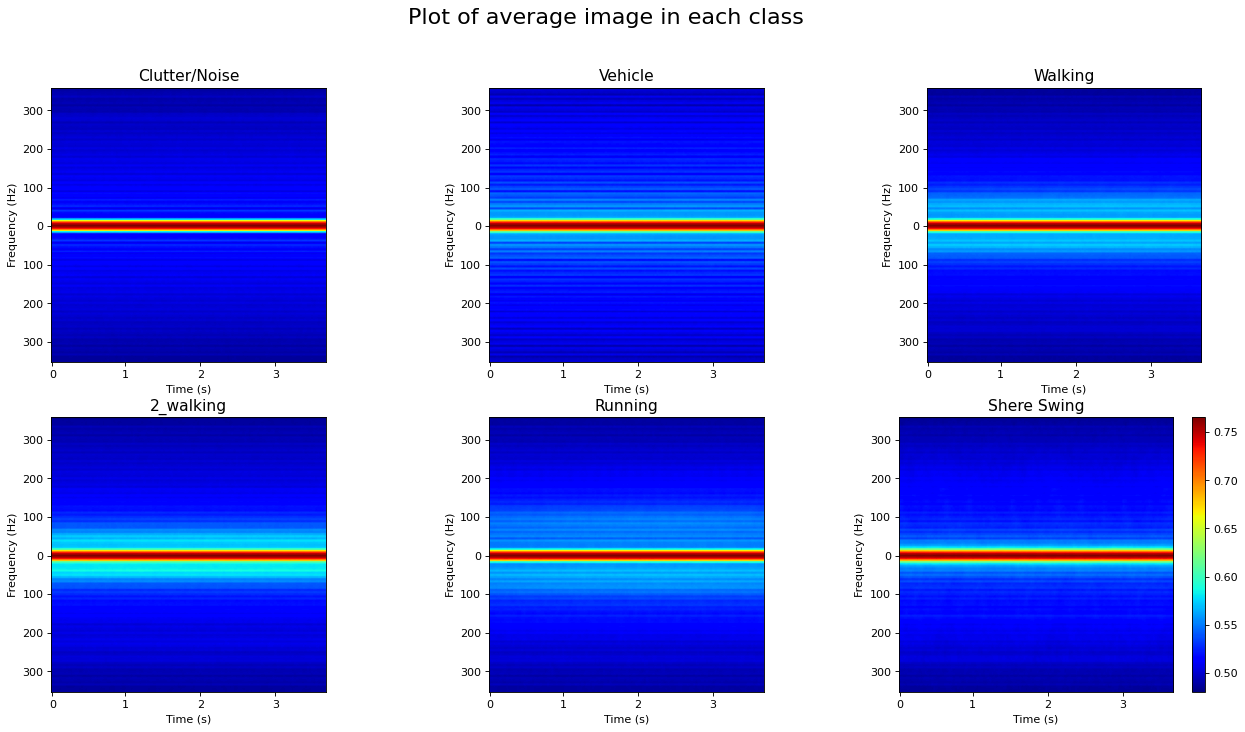

In [382]:
my_dpi = 80
fig = plt.figure(figsize=(20, 10), dpi=my_dpi)
print(fig)

fig.suptitle('Plot of average image in each class', fontsize=20)

# Add plots
ax1 = fig.add_subplot(2, 3, 1)
cs = ax1.imshow(avg_clutter_image, cmap='jet')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Frequency (Hz)')
ax1.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax1.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax1.set_xticks([0, 34, 69, 104])
ax1.set_xticklabels([0, 1, 2, 3])  

ax1.set_title('Clutter/Noise',   
             fontsize = 14) 

ax2 = fig.add_subplot(2, 3, 2)
ax2.imshow(avg_vehicle_image, cmap='jet')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Frequency (Hz)')
ax2.set_title('Vehicle',   
             fontsize = 14)
ax2.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax2.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax2.set_xticks([0, 34, 69, 104])
ax2.set_xticklabels([0, 1, 2, 3])  

ax3 = fig.add_subplot(2, 3, 3)
ax3.imshow(avg_walking_image, cmap='jet')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Frequency (Hz)')
ax3.set_title('Walking',   
             fontsize = 14)
ax3.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax3.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax3.set_xticks([0, 34, 69, 104])
ax3.set_xticklabels([0, 1, 2, 3])  

ax4 = fig.add_subplot(2, 3, 4)
ax4.imshow(avg_walking_2_image, cmap='jet')
ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Frequency (Hz)')
ax4.set_title('2_walking',   
             fontsize = 14) 
ax4.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax4.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax4.set_xticks([0, 34, 69, 104])
ax4.set_xticklabels([0, 1, 2, 3])               

ax5 = fig.add_subplot(2, 3, 5)
ax5.imshow(avg_running_image, cmap='jet')
ax5.set_xlabel('Time (s)')
ax5.set_ylabel('Frequency (Hz)')
ax5.set_title('Running',   
             fontsize = 14)
ax5.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax5.set_yticklabels([300, 200, 100, 0, 100, 200, 300]) 
ax5.set_xticks([0, 34, 69, 104])
ax5.set_xticklabels([0, 1, 2, 3])              

ax6 = fig.add_subplot(2, 3, 6)
ax6.imshow(avg_sphere_swing_image, cmap='jet')
ax6.set_xlabel('Time (s)')
ax6.set_ylabel('Frequency (Hz)')
ax6.set_title('Shere Swing',   
             fontsize = 14) 
ax6.set_yticks([10,  28, 46, 64, 82, 100, 118])
ax6.set_yticklabels([300, 200, 100, 0, 100, 200, 300])
ax6.set_xticks([0, 34, 69, 104])
ax6.set_xticklabels([0, 1, 2, 3]) 

fig.colorbar(cs)
fig.savefig('Subplot_avg_images.png')

Text(0.5, 1.0, 'Walking')

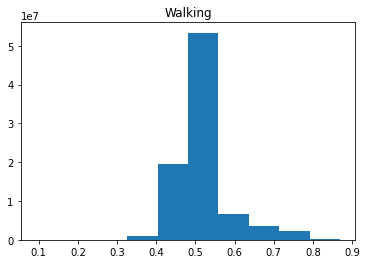

In [389]:
plt.hist(walking_data)
plt.title("Walking")

Text(0.5, 1.0, 'Running')

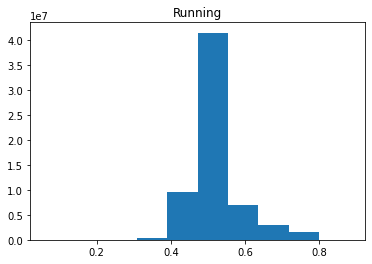

In [390]:
plt.hist(running_data) 
plt.title("Running")

Text(0.5, 1.0, 'Vehicle')

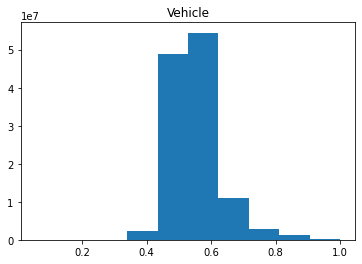

In [391]:
plt.hist(vehicle_data)
plt.title("Vehicle")

Text(0.5, 1.0, 'Clutter/noise')

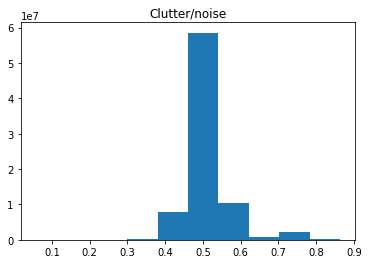

In [392]:
plt.hist(clutter_data)
plt.title("Clutter/noise")

Text(0.5, 1.0, 'Sphere Swing')

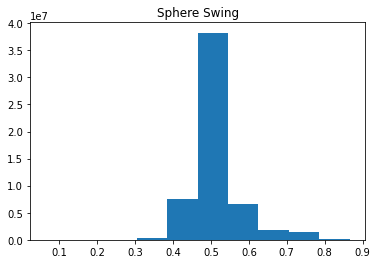

In [393]:
plt.hist(sphere_swing_data)
plt.title("Sphere Swing")

Text(0.5, 1.0, '2_Walking')

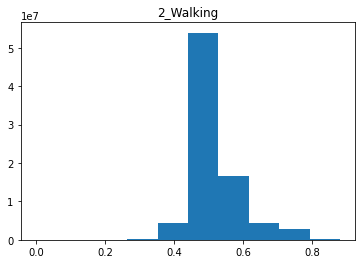

In [394]:
plt.hist(walking_2_data)
plt.title("2_Walking")